In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('./ml5/train.csv', sep=';', na_values='None')

In [2]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Бинаризуем категориальные признаки 
CATEGORY_COLS = ['gender', 'cholesterol', 'gluc']
data = pd.get_dummies(data, columns=CATEGORY_COLS)

In [5]:
data['height_to_weight'] = data['height'] / data['weight']
data['ap_diff'] = data['ap_hi'] - data['ap_lo']
data['ap_ratio'] = data['ap_lo'] / data['ap_hi']
data.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,...,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,height_to_weight,ap_diff,ap_ratio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.359229,74.205690,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700,...,0.349571,0.748357,0.136414,0.115229,0.849700,0.074143,0.076157,2.287177,32.186871,0.806450
std,28851.302323,2467.251667,8.210126,14.395757,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003,...,0.476838,0.433960,0.343230,0.319300,0.357368,0.262005,0.265251,0.404680,241.469638,9.000768
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.446429,-10800.000000,-4.666667
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.012987,40.000000,0.615385
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.291667,40.000000,0.666667
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.538462,50.000000,0.666667
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.500000,15940.000000,2088.000000


In [6]:
X_train = data.drop(['cardio', 'id'], 1).as_matrix()
y_train = data['cardio'].as_matrix()

132 0.53566977105


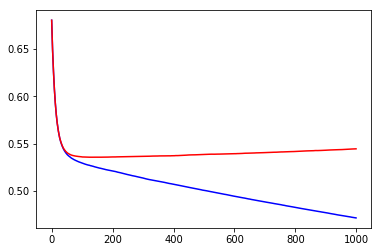

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Разбиваем выборку на обучение и тест
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, 
                                                        y_train,
                                                        test_size=0.33, 
                                                        random_state=42)

LEARNING_RATE = 0.05
MAX_DEPTH = 5
SUBSAMPLE = 0.75
MAX_FEATURES = 0.5
LEAF = 8

# Создаем класс модели градиентного бустинга
clf = GradientBoostingClassifier(n_estimators=1000, 
                                 learning_rate=LEARNING_RATE,
                                 max_depth=MAX_DEPTH, 
                                 subsample=SUBSAMPLE,
                                 max_features=MAX_FEATURES,
                                 min_samples_leaf=LEAF)

# Обучаем модель на обучающей выборке
clf.fit(X_train_, y_train_)

test_score = np.zeros((clf.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict_proba(X_test_)):
    test_score[i] = log_loss(y_test_, y_pred)
    
train_score = np.zeros((clf.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict_proba(X_train_)):
    train_score[i] = log_loss(y_train_, y_pred)

# Находим оптимальное число итераций на тесте
print(np.argmin(test_score), np.min(test_score))

# Выводим зависимость качества от числа итераций
plt.plot(range(len(train_score)), train_score, 'b-',
         range(len(test_score)), test_score, 'r-')